<a href="https://colab.research.google.com/github/Sjleerodls/lab_python/blob/main/python15_inheritance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inheritance(상속)

* super class(상위 클래스), parent class(부모 클래스)
* sub class(하위 클래스), child class(자식 클래스)
* 상속 : 상위 클래스의 여러 속성(변수)들과 기능(메서드)들을 하위 클래스에서 재사용하는 것.
* IS-A 관계가 성립하는 객체들을 상속 관계로 구현.
    * 학생은 사람이다. (Student IS A Person.)
        * 사람 - 상위 클래스
        * 학생 - 하위 클래스
    * 상위 클래스를 하위 클래스에서 확장하는 것.
* HAS-A 관계가 성립하는 객체들은 일반적으로 상속이 아니라 속성을 사용해서 클래스를 구현함.
    * 학생은 시험점수를 가지고 있다. (Student Has A Score.)
        * 학생 클래스에서 변수들 중 하나로 Score 클래스 타입을 선언(self.score).

* 문법
    ```
    class SubClass(SuperClass):
        클래스 몸체 (body)
    ```


In [1]:
class Person:
    def __init__(self, name):
        self.name = name

    def say_hello(self):
        print(f'안녕하세요, 저는 {self.name}입니다.')

In [2]:
oh_ssam = Person('오쌤')
oh_ssam.say_hello()

안녕하세요, 저는 오쌤입니다.


In [6]:
# Person을 상속(확장)하는 Student 클래스 선언 :
class Student(Person):
    def say_hello2(self):
        print('저는 학생입니다.')

In [8]:
stu = Student('오쌤')

In [82]:
stu.say_hello()

안녕하세요, 저는 오쌤입니다.


In [9]:
stu.say_hello2()

저는 학생입니다.


# Method Override

* 상위 클래스의 메서드를 하위 클래스에서 *같은 이름으로* 재정의하는 것.
* 하위 클래스에서 override된 상위 클래스의 메서드를 호출하기 위해서는 `super().method_name(arg)` 형식으로 사용함.

In [19]:
# 회사원은 사람이다.(회사원 - 하위 클래스, 사람 - 상위 클래스)
class BusinessPerson(Person):
    # __init__ 메서드 override
    def __init__(self, name, company):
        # 상위 클래스의 생성자인 __init__ 메서드 호출 :
        super().__init__(name)

        self.company = company

    # say_hello 메서드 override
    def say_hello(self):
        # 상위 클래스(Person)의 say_hello() 메서드 호출 :
        super().say_hello()
        print(f'그리고 저는 {self.company}에 다닙니다.')

In [20]:
# Businessperson 타입 객체 생성
gildong = BusinessPerson('홍길동', '아이티윌')

In [21]:
print(gildong.name, gildong.company)

홍길동 아이티윌


In [22]:
gildong.say_hello()

안녕하세요, 저는 홍길동입니다.
그리고 저는 아이티윌에 다닙니다.


In [87]:
class Parent:
    def __init__(self, name):
        self.name = name

    # def say_hello(self):
    #     print(f'나는 {self.name}')

    def daddy(self):
        print(f'아빠 이름 {self.name}')

class Child(Parent):
    def __init__(self, daddy_name, my_name):
        super().__init__(daddy_name)
        self.my_name = my_name
        # super().__init__('허균')

    def its_me(self):
        print(f'내 이름 {self.my_name}')

In [88]:
ch = Child('허균', '길동')
print(ch.name)
ch.daddy()
ch.its_me()

허균
아빠 이름 허균
내 이름 길동


In [93]:
# 부모 클래스
class Parent:
    def __init__(self, name):
        self.name = name

# 자녀 클래스
class Child(Parent):
    def __init__(self, name):
        super().__init__('허균')
        self.child_name = name  # 자식 클래스의 이름을 다른 변수에 저장

    def __str__(self):
        return f'child.name={self.child_name}, parent.name={self.name}' # 부모 클래스의 name에 접근

In [94]:
t_ch = Child('길동')
print(t_ch.name)
print(t_ch)

허균
child.name=길동, parent.name=허균


In [91]:
class Parent:
    def __init__(self, name):
        self.name = name

class Child(Parent):
    def __init__(self, name):
        super().__init__(name) # 자식 클래스의 이름으로 부모 클래스 초기화

    def __str__(self):
        return f'child.name={self.name}, parent.name={self.name}' # 부모 클래스의 name에 접근

# `isinstance(object, ClassName)` 함수

객체(object)가 어떤 클래스 타입의 인스턴스인 지(True) 아닌 지(False)를 리턴하는 함수.

In [99]:
numbers = [1, 2, 3]
print(isinstance(numbers, list))    # True
print(isinstance(numbers, dict))    # False
print(isinstance(numbers, tuple))   # False

True
False
False


## `isinstance` 함수와 상속

In [100]:
# 전기 자동차는 자동차다.(자동차 - 상위 클래스, 전기 자동차 - 하위 클래스)
class Car:
    pass

class ElectricCar(Car):
    pass

In [103]:
sonata = Car()  # Car 타입의 객체 생성
print(isinstance(sonata, Car))
print(isinstance(sonata, ElectricCar))

True
False


In [107]:
ionic9 = ElectricCar()  # ElectricCar 타입의 객체 생성
print(isinstance(ionic9, Car))
print(isinstance(ionic9, ElectricCar))

True
True


## `isinstance` 함수 활용

In [108]:
# 강아지는 동물이다. 물고기는 동물이다. (동물 - 상위 클래스, 강아지/물고기 - 하위 클래스)
class Animal:
    def move(self):
        pass

class Dog(Animal):
    # method override
    def move(self):
        print('강아지가 총총총...')

class Fish(Animal):
    def move(self):
        print('물고기 스윔스윔...')

class Tree:
    pass

In [110]:
dog = Dog()     # Dog 타입의 객체 생성
fish = Fish()   # Fish 타입의 객체 생성
tree = Tree()   # Tree 타입의 객체 생성
arr = [dog, fish, tree]
for x in arr:
    if isinstance(x, Animal):
        x.move()

강아지가 총총총...
물고기 스윔스윔...


# 상속 관계 클래스 작성 연습

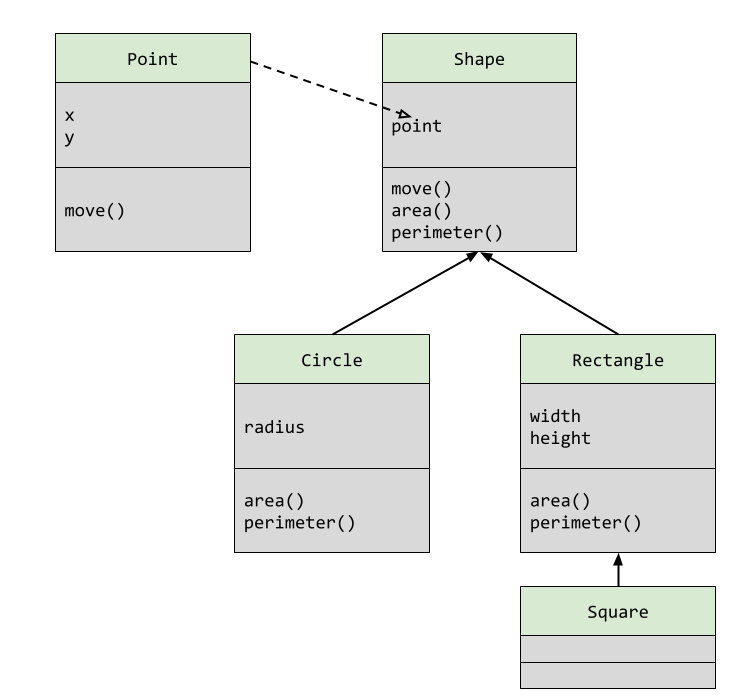

In [232]:
class Point():
    def __init__ (self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'Point(x={self.x}, y={self.y})'

    def move(self, dx, dy):
        self.x += dx
        self.y += dy
        return self

In [233]:
pt1 = Point()
print(pt1)

Point(x=0, y=0)


In [234]:
pt2 = Point(x=1, y=1)
pt2

Point(x=1, y=1)

In [235]:
pt2.move(2, 1).move(0,1)

Point(x=3, y=3)

In [236]:
# 도형은 점을 가지고 있다. (HAS-A 관계)
class Shape:
    def __init__(self, x=0, y=0):
        self.point = Point(x,y)     # point 변수 안에 class 'Point(x,y)'를 할당.

    def __repr__(self):
        return f'Shape(point={self.point})'

    # def move(self, dx, dy):     # by lsj
    #     self.point.x += dx
    #     self.point.y += dy
    #     return self

    def move(self, dx, dy):         # Point class의 move 메서드 재사용.
        self.point.move(dx, dy)
        return self

    def area(self): # body를 만들 수 없으면 일단 pass로 넘어가기
        # pass
        raise NotImplementedError('넓이 계산 메서드를 구현해야 합니다.')     # 아직 미구현 상태를 표출

    def perimeter(self):
        raise NotImplementedError('둘레 계산 메서드를 구현해야 합니다.')

In [241]:
# test Shape
s1 = Shape(1, 1)
s1.move(2,2)
# s1.area()

Shape(point=Point(x=3, y=3))

In [245]:
sh1 = Shape()
sh1
# sh1.perimeter()

Shape(point=Point(x=0, y=0))

In [246]:
sh1.move(1, -1)

Shape(point=Point(x=1, y=-1))

In [284]:
# 원은 도형이다. (IS-A 관계)
class Circle(Shape):
    def __init__(self, center_x=0, center_y=0, radius=0):
        super().__init__(x=center_x, y=center_y)        # 오쌤
        # self.point = Point(center_x, center_y)
        self.radius = radius

    def __repr__(self):
        return f'Circle(center={self.point}, radius={self.radius})'     # Shape을 상속 받아서 self.point를 별도로 선언하지 않아도 사용 가능함.

    # 상위 클래스 Shape에서 선언된 area, perimeter 메서드 재정의(override)
    def area(self):
        return 3.14 * self.radius ** 2

    def perimeter(self):
        return self.radius * 3.14 * 2

In [283]:
# test Circle
c1 = Circle(1, 1, 4)
print(c1)
print(c1.area())
print(c1.perimeter())

Circle(center=Point(x=1, y=1), radius=4)
50.24
25.12


In [289]:
c1 = Circle(0, 0, 1)
c1

Circle(center=Point(x=0, y=0), radius=1)

In [290]:
c1.move(1, 2)

Circle(center=Point(x=1, y=2), radius=1)

In [294]:
c1.area()

3.14

In [295]:
c1.perimeter()

6.28

In [305]:
# 직사각형은 도형이다. (IS-A 관계)
class Rectangle(Shape):
    def __init__(self, corner_x, corner_y, width, height):
        super().__init__(corner_x, corner_y)      # 상속 받겠다 __init__ 을
        # self.point = Point(x, y)
        self.width = width
        self.height= height

    def __repr__(self):
        return f'Rectangle(corner={self.point}, width={self.width}, height={self.height})'

    # Shape 클래스의 area, perimieter 메서드 override
    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

In [306]:
# Rectangle Test
r1 = Rectangle(1,2, 2, 3)
print(r1)
print(r1.area())
print(r1.perimeter())

Rectangle(corner=Point(x=1, y=2), width=2, height=3)
6
10


In [308]:
rect1 = Rectangle(0, 0, 4, 3)
rect1

Rectangle(corner=Point(x=0, y=0), width=4, height=3)

In [310]:
rect1.move(-1, -1)

Rectangle(corner=Point(x=-2, y=-2), width=4, height=3)

In [311]:
rect1.area()

12

In [312]:
rect1.perimeter()

14

In [279]:
# 정사각형은 직사각형이다. (IS - A 관계)
class square(Rectangle):
    def __init__(self, x, y, side):
        self.point = Point(x,y)
        self.side = side

    def __repr__(self):
        return f'Square(point={self.point}, side={self.side})'

    def area(self):
        super().area()
        return self

    def perimeter(self):
        super().perimeter()
        return self

In [278]:
s1 = square(2, 2, 3)
print(s1)
print(s1.area())

TypeError: Rectangle.__init__() missing 4 required positional arguments: 'x', 'y', 'width', and 'height'